First try to visualize the sorted data.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak
import os
import scipy.optimize as sc
import matplotlib as mpl
import glob


In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
data_path = "/home/haue/repositories/Masters/data/sorted"
outputdir = "/figure_output/"
## Load in all files from the datapath with the suffix mlio.root
files = glob.glob(os.path.join(data_path, "*m.root"))


In [6]:
r = 0
dum = 0
Energies_id0 = []
Energies_id1 = []
Energies_id2 = []
Energies_id3 = []
Es = [Energies_id0, Energies_id1, Energies_id2, Energies_id3]

for f in files:
    r = uproot.open(f)["a101"]
    dum = r.arrays(["id", "FE", "BE"])
    ids = ak.flatten(dum.id)
    FEs = ak.flatten(dum.FE)
    BEs = ak.flatten(dum.BE)
    for (i, e) in zip(range(0, 4), Es) :
        mask = (ids == i)
        f_FEs = FEs[mask]
        f_BEs = BEs[mask]
        e.extend((f_FEs + f_BEs) /2)
    #print("file ", f, " processed")
    if f==files[-1]:
        print("Done!")


Done!


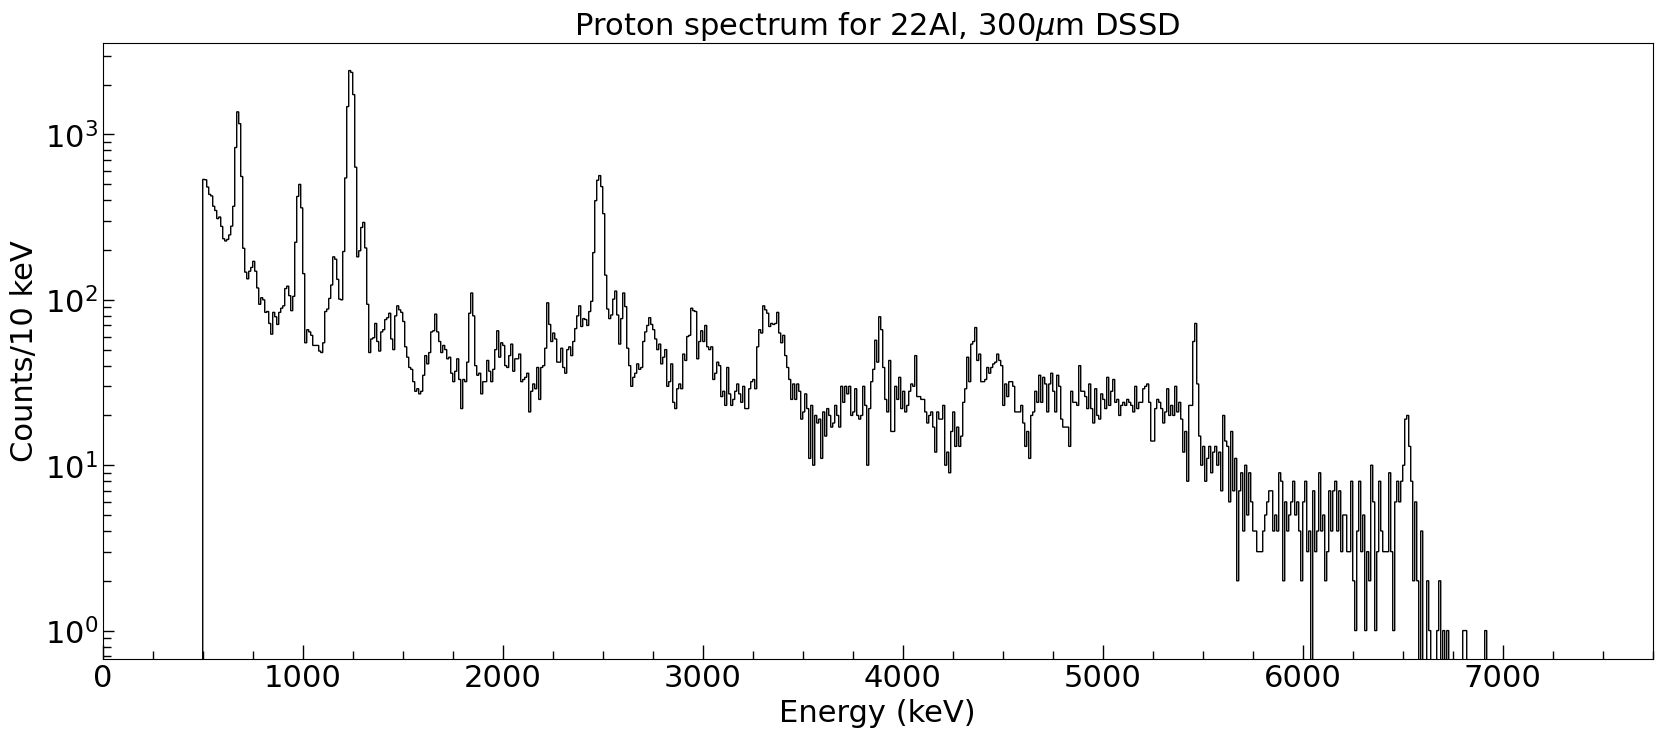

45597

In [7]:
Energies = np.array(Es[3])
Energies = Energies[Energies > 500]
bin_width = 10 # keV
bins = np.arange(500, 7000 + bin_width, bin_width)



plt.figure(figsize=(20,8))


plt.hist(Energies, bins=bins, histtype='step', color='k')
plt.yscale('log')
plt.tick_params(axis='y', which='major', direction='in', length=8, width=1, labelsize=22)
plt.tick_params(axis='x', which='major', direction='in', length=10, width=1, labelsize=22)
plt.tick_params(axis='both', which='minor', direction='in', length=6, width=1, labelsize=22)
plt.xticks(np.arange(0,8000,1000))
plt.gca().set_xticks(np.arange(0, 8000, 250), minor=True)
plt.title(r'Proton spectrum for 22Al, 300$\mu$m DSSD ', fontsize=22)
plt.ylabel('Counts/10 keV', fontsize=22)
plt.xlabel('Energy (keV)', fontsize=22)
plt.show()
len(Energies)


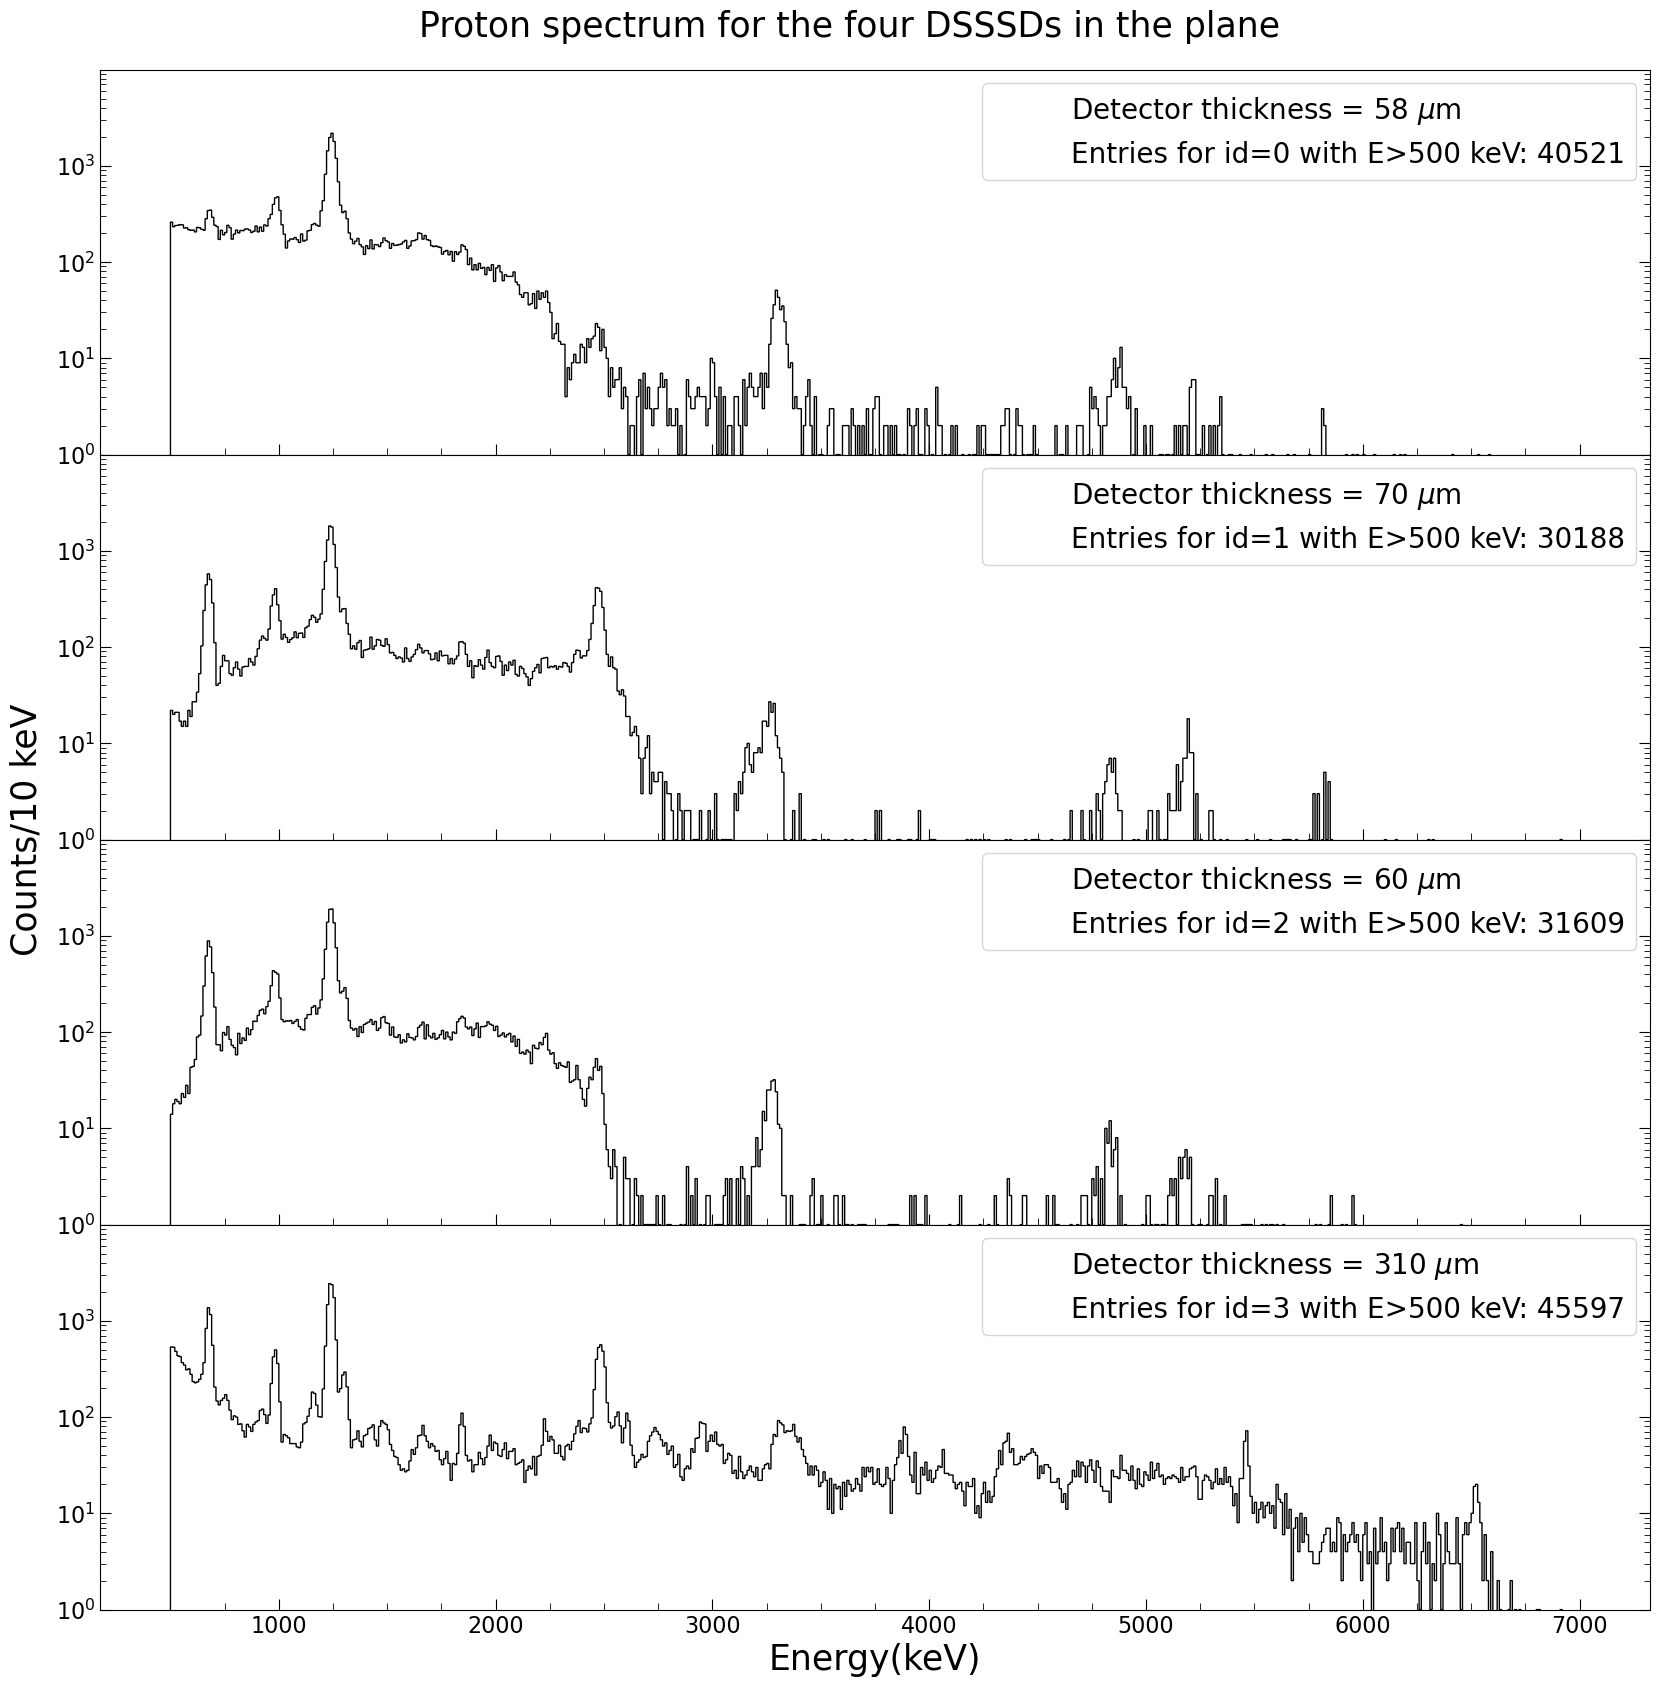

In [9]:
plt.rc("axes", labelsize=16)
plt.rc("xtick", labelsize=16, top=False, direction="in")
plt.rc("xtick.major", size=8)
plt.rc("xtick.minor", size=5)
plt.rc("ytick", labelsize=16, right=True, direction="in")
plt.rc("ytick.major", size=8)
plt.rc("ytick.minor", size=4)
plt.rc("axes", titlesize=12)
plt.rc("legend", fontsize=20)

#Energies = np.array(Es)
#Energies = Energies[Energies > 500]
bin_width = 10 # keV
bins = np.arange(500, 7000 + bin_width, bin_width)
thicknesses = [58, 70, 60, 310] #for U1, U2, U3, U4(id=0,1,2,3) U5=1002 um U6 = 67 um
fig, axs = plt.subplots(4, 1, figsize=(20,20), sharex=True)
plt.subplots_adjust( hspace = 0.0)
ax0, ax1, ax2, ax3 = axs
for (i,ax, e) in zip(range(0,4),axs, Es):
   e = np.array(e)
   e = e[e>500]
   label1 = f"Entries for id={i} with E>500 keV: {len(e)}"
   label2 = r"Detector thickness = {} $\mu$m".format(thicknesses[i])
   ax.plot([], [], ls='', color='none', label=label2)
   ax.plot([], [], ls='', color='none', label=label1)
   ax.hist(e, bins=bins, histtype='step', color='k')
   ax.set_yscale("log")
   ax.set_xticks(np.arange(500, 7000, 250), minor=True)
   ax.legend(loc='upper right')
   ax.set_ylim(ymin=1, ymax=9999)
plt.xlabel("Energy(keV)", fontsize=25)
plt.suptitle("Proton spectrum for the four DSSSDs in the plane", fontsize=25, y=0.91)
fig.text(0.08, 0.5, "Counts/10 keV", va='center', rotation='vertical', fontsize=25)
plt.savefig("/home/haue/repositories/Masters/analysis/python/figure_output/Sorteddata_dssdplots.png")
